In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

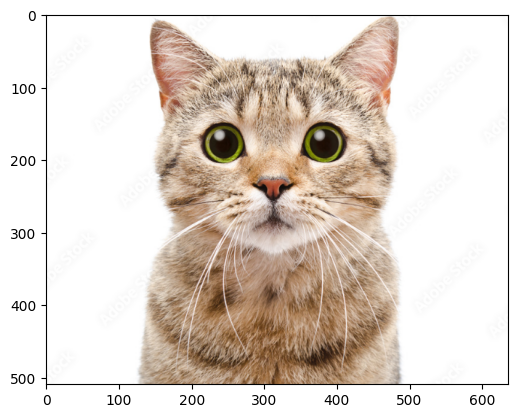

In [2]:
image = cv2.imread('/kaggle/input/kittyimg/Screenshot (46).png', cv2.IMREAD_GRAYSCALE)
original_img = plt.imread('/kaggle/input/kittyimg/Screenshot (46).png')
plt.imshow(original_img)

In [3]:
image

array([[255, 255, 255, ..., 254, 253, 254],
       [255, 255, 255, ..., 254, 251, 250],
       [255, 255, 255, ..., 255, 252, 247],
       ...,
       [251, 252, 254, ..., 255, 255, 255],
       [254, 255, 255, ..., 255, 255, 255],
       [254, 255, 254, ..., 255, 255, 255]], dtype=uint8)

# **Histogram**

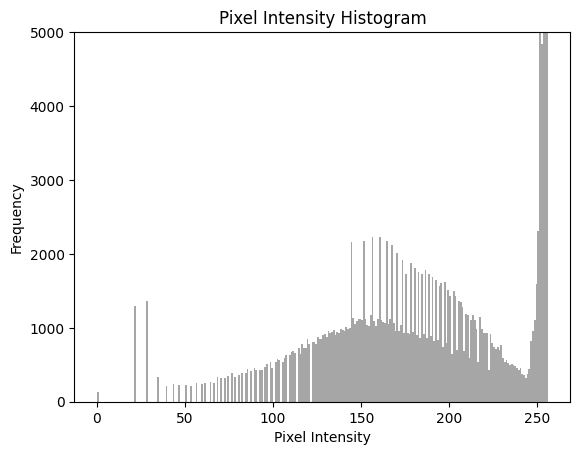

In [4]:
pixel_values = image.flatten()
plt.hist(pixel_values, bins=256, range=[0, 256], density=False, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.ylim(0, 5000)
plt.title('Pixel Intensity Histogram')
plt.show()

# **Equalization**

Compute the Histogram: Calculate the histogram of the original image. The histogram represents the distribution of pixel intensities.

Compute the Cumulative Distribution Function (CDF): Calculate the cumulative distribution function from the histogram. The CDF at each intensity level gives the cumulative probability of the intensity occurring in the image.

Normalize the CDF: Normalize the CDF to scale it to the full range of intensity values (usually 0 to 255 in an 8-bit image).

Map the Intensities: Use the normalized CDF to map the original pixel intensities to new values. This remapping helps to spread the intensities more evenly across the entire range.

Create the Equalized Image: Replace the original pixel values with their corresponding values from the mapping step.

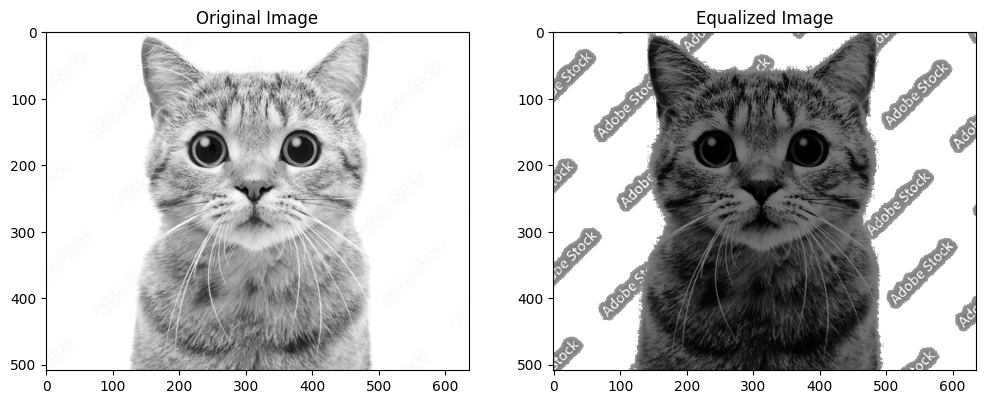

In [5]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()

In [6]:
equalized_image

array([[255, 255, 255, ..., 148, 140, 148],
       [255, 255, 255, ..., 148, 131, 127],
       [255, 255, 255, ..., 255, 135, 124],
       ...,
       [131, 135, 148, ..., 255, 255, 255],
       [148, 255, 255, ..., 255, 255, 255],
       [148, 255, 148, ..., 255, 255, 255]], dtype=uint8)

# **Edge detection**

The Prewitt filter is a convolutional operator used for edge detection in image processing. It's specifically designed to approximate the gradient of the image intensity function. Like the Sobel filter, the Prewitt filter is used to highlight edges by emphasizing the changes in intensity in different directions.

The Prewitt filter consists of two kernels, one for detecting vertical edges and the other for detecting horizontal edges. The kernels are:

**Vertical (for detecting vertical edges):**
\[ P_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} \]

**Horizontal (for detecting horizontal edges):**
\[ P_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} \]

Here, \(P_x\) is the kernel for detecting vertical edges, and \(P_y\) is the kernel for detecting horizontal edges. The convolution of these kernels with the image highlights the regions of significant intensity changes in the corresponding directions.

The convolution operation involves sliding the kernels over the image and computing the sum of element-wise products at each position. The resulting convolution outputs, \(P_x\) and \(P_y\), represent the gradients of the image in the horizontal and vertical directions, respectively.

In Python, you can use the `cv2.filter2D` function from the OpenCV library to apply the Prewitt filter to an image, as shown in the previous code example. The filter enhances the edges in the image, making them more prominent and aiding in subsequent edge analysis or feature extraction tasks.

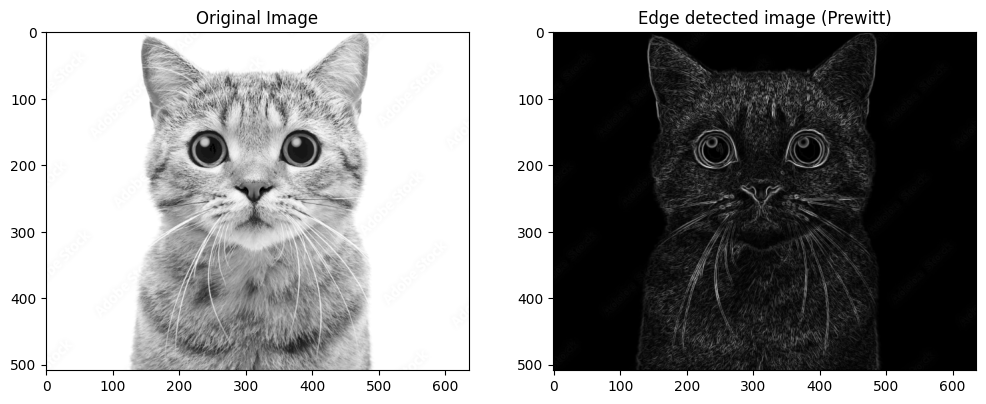

In [7]:
# Apply the Prewitt filter for horizontal and vertical edges
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_y)

# Calculate the gradient magnitude and direction
gradient_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
gradient_direction = np.arctan2(prewitt_y, prewitt_x)

# Optionally, you can normalize the gradient magnitude to the range [0, 255]
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edge detected image (Prewitt)')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()

In [8]:
gradient_magnitude

array([[0, 0, 0, ..., 4, 3, 0],
       [0, 0, 0, ..., 4, 6, 4],
       [0, 0, 0, ..., 3, 7, 2],
       ...,
       [7, 7, 6, ..., 0, 0, 0],
       [4, 3, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

# **Correlation and Convolution**

The values in a convolution or correlation kernel indicate the weights assigned to the corresponding pixels when performing the convolution or correlation operation. These weights determine how much influence each pixel has on the result of the operation. In other words, the kernel defines a local filter or mask that is applied to each pixel in the image.
In this kernel, positive values (e.g., 1 and 2) indicate an emphasis on pixel intensities in that position, while negative values (e.g., -1 and -2) indicate a de-emphasis or suppression of pixel intensities. The specific pattern of values in the kernel determines the type of operation that will be performed on the image.
In the case of the provided kernel, it resembles a simple horizontal edge-detection filter. It emphasizes differences in intensity between pixels horizontally. When applied to an image, this type of kernel highlights vertical edges.

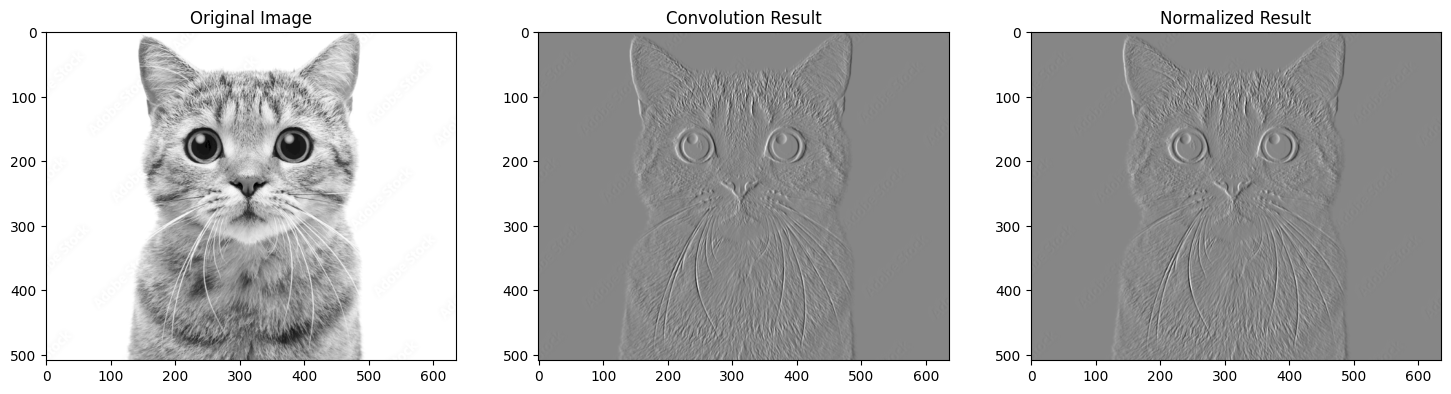

In [9]:
# Define a simple kernel for illustration
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply convolution using cv2.filter2D
convolution_result = cv2.filter2D(image, cv2.CV_64F, kernel)

# Normalize the pixel values to the range [0, 255]
convolution_result_normalized = cv2.normalize(convolution_result, None, 0, 255, cv2.NORM_MINMAX)

# Display the original, convolved, and normalized images
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Convolution Result')
plt.imshow(convolution_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Normalized Result')
plt.imshow(convolution_result_normalized, cmap='gray')

plt.show()

In [10]:
convolution_result

array([[  0.,   0.,   0., ...,  12.,   8.,   0.],
       [  0.,   0.,   0., ...,  13.,  16.,   0.],
       [  0.,   0.,   0., ...,  10.,  26.,   0.],
       ...,
       [  0.,  -8., -10., ...,   0.,   0.,   0.],
       [  0.,  -5.,  -2., ...,   0.,   0.,   0.],
       [  0.,  -2.,   2., ...,   0.,   0.,   0.]])

In [11]:
convolution_result_normalized

array([[134.06845448, 134.06845448, 134.06845448, ..., 136.22794637,
        135.50811574, 134.06845448],
       [134.06845448, 134.06845448, 134.06845448, ..., 136.40790402,
        136.94777699, 134.06845448],
       [134.06845448, 134.06845448, 134.06845448, ..., 135.86803105,
        138.74735356, 134.06845448],
       ...,
       [134.06845448, 132.62879323, 132.26887791, ..., 134.06845448,
        134.06845448, 134.06845448],
       [134.06845448, 133.1686662 , 133.70853917, ..., 134.06845448,
        134.06845448, 134.06845448],
       [134.06845448, 133.70853917, 134.4283698 , ..., 134.06845448,
        134.06845448, 134.06845448]])

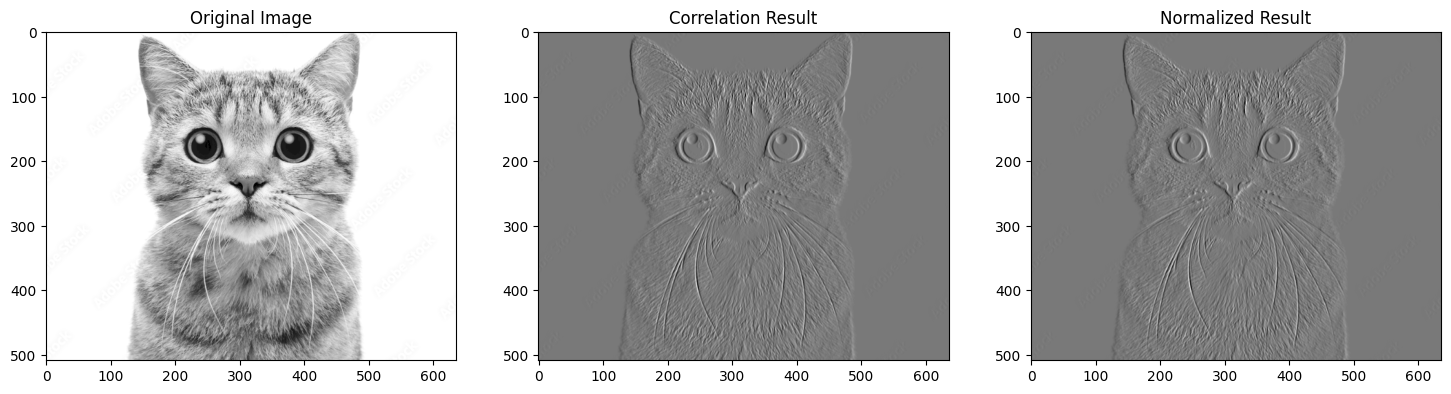

In [12]:
# Define a simple kernel for illustration
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply correlation using cv2.filter2D with a flipped kernel
correlation_result = cv2.filter2D(image, cv2.CV_64F, kernel[::-1, ::-1])

# Normalize the pixel values to the range [0, 255]
correlation_result_normalized = cv2.normalize(correlation_result, None, 0, 255, cv2.NORM_MINMAX)

# Display the original, correlated, and normalized images
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Correlation Result')
plt.imshow(correlation_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Normalized Result')
plt.imshow(correlation_result_normalized, cmap='gray')

plt.show()

In [13]:
correlation_result

array([[  0.,   0.,   0., ..., -12.,  -8.,   0.],
       [  0.,   0.,   0., ..., -13., -16.,   0.],
       [  0.,   0.,   0., ..., -10., -26.,   0.],
       ...,
       [  0.,   8.,  10., ...,   0.,   0.,   0.],
       [  0.,   5.,   2., ...,   0.,   0.,   0.],
       [  0.,   2.,  -2., ...,   0.,   0.,   0.]])

In [14]:
correlation_result_normalized

array([[120.93154552, 120.93154552, 120.93154552, ..., 118.77205363,
        119.49188426, 120.93154552],
       [120.93154552, 120.93154552, 120.93154552, ..., 118.59209598,
        118.05222301, 120.93154552],
       [120.93154552, 120.93154552, 120.93154552, ..., 119.13196895,
        116.25264644, 120.93154552],
       ...,
       [120.93154552, 122.37120677, 122.73112209, ..., 120.93154552,
        120.93154552, 120.93154552],
       [120.93154552, 121.8313338 , 121.29146083, ..., 120.93154552,
        120.93154552, 120.93154552],
       [120.93154552, 121.29146083, 120.5716302 , ..., 120.93154552,
        120.93154552, 120.93154552]])

# **Average & Median filtering**

Average Filtering:
In average filtering (also known as mean filtering), a kernel is applied to each pixel in the image. The value of each pixel in the resulting image is replaced by the average of the pixel values in its neighborhood. The size of the neighborhood is determined by the size of the kernel.

Median Filtering:
In median filtering, instead of taking the average, the pixel value of each location is replaced by the median value of the pixel values in its neighborhood. Median filtering is particularly effective at removing salt-and-pepper noise.

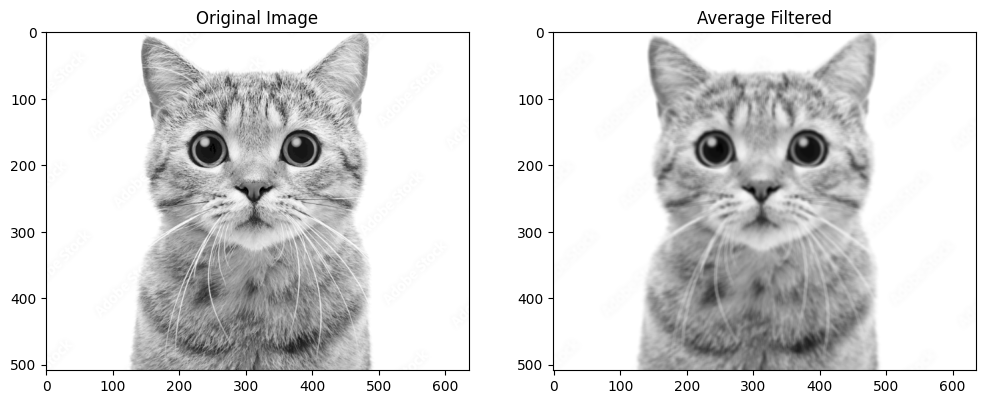

In [15]:
# Define the kernel for average filtering (e.g., 5x5 kernel)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# Apply the average filter
average_filtered = cv2.filter2D(image, -1, kernel)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filtered')
plt.show()

In [16]:
average_filtered

array([[255, 255, 255, ..., 253, 253, 252],
       [255, 255, 255, ..., 253, 253, 253],
       [255, 255, 255, ..., 253, 253, 253],
       ...,
       [252, 252, 253, ..., 255, 255, 255],
       [253, 253, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)

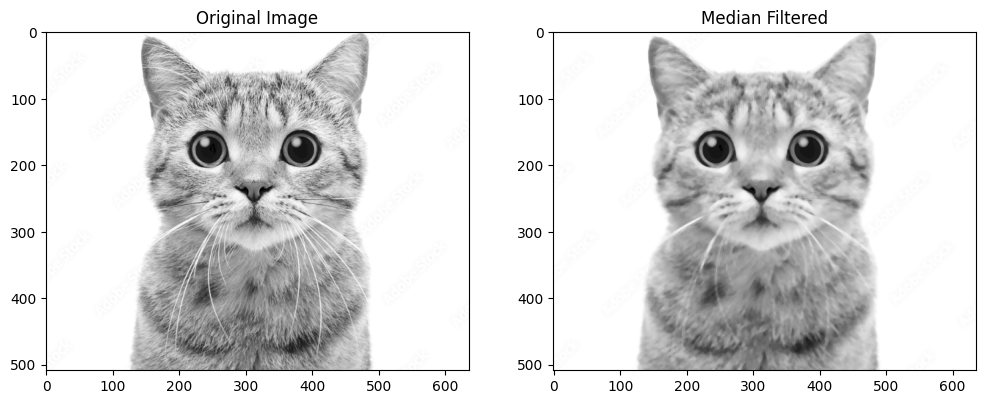

In [17]:
# Apply median filter
median_filtered = cv2.medianBlur(image, ksize=5)  # ksize is the size of the kernel (odd number)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()

In [18]:
median_filtered

array([[255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 253],
       [255, 255, 255, ..., 254, 254, 252],
       ...,
       [251, 253, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)

# **Sharpening using low pass and high pass**

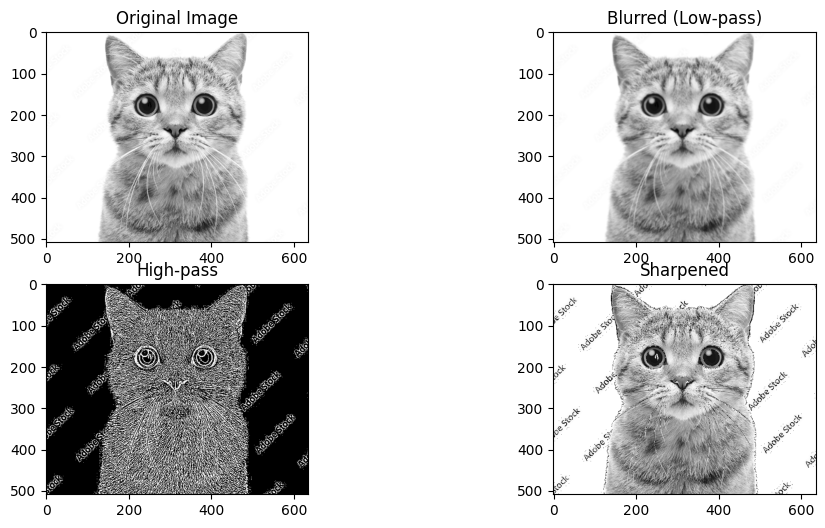

In [19]:
# Apply a low-pass filter (e.g., Gaussian blur)
blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust kernel size as needed

# Create a high-pass filter (original - low-pass)
high_pass = image - blurred

# Combine the high-pass with the original image
sharpened = image + high_pass

# Clip values to ensure they are in the valid intensity range [0, 255]
sharpened = np.clip(sharpened, 0, 255)

# Display the original, blurred, high-pass, and sharpened images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(blurred, cmap='gray'), plt.title('Blurred (Low-pass)')
plt.subplot(2, 2, 3), plt.imshow(high_pass, cmap='gray'), plt.title('High-pass')
plt.subplot(2, 2, 4), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.show()

In [20]:
blurred

array([[255, 255, 255, ..., 254, 252, 252],
       [255, 255, 255, ..., 254, 252, 252],
       [255, 255, 255, ..., 254, 252, 251],
       ...,
       [252, 252, 253, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)

In [21]:
high_pass

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0, 255, 254],
       [  0,   0,   0, ...,   1,   0, 252],
       ...,
       [255,   0,   1, ...,   0,   0,   0],
       [  0,   1,   1, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0]], dtype=uint8)

In [22]:
sharpened

array([[255, 255, 255, ..., 254, 254,   0],
       [255, 255, 255, ..., 254, 250, 248],
       [255, 255, 255, ...,   0, 252, 243],
       ...,
       [250, 252, 255, ..., 255, 255, 255],
       [254,   0,   0, ..., 255, 255, 255],
       [254,   0, 254, ..., 255, 255, 255]], dtype=uint8)